<a href="https://colab.research.google.com/github/flo-shi/Recommender-System/blob/master/recommenda_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats # For statistical functions
from sklearn.model_selection import train_test_split # Splitting train and test data
from sklearn.metrics.pairwise import cosine_similarity # For user to user similarities
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing datasets

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Books.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Ratings.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Users.csv')

<ipython-input-3-09f4737577b5>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Books.csv')


Understanding this dataset

In [4]:
# df1 Books
print(df1.shape) # No of rows and columns
df1.head() # First 5 rows in the dataset

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
df1.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
df1.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [7]:
# df2 Ratings
print(df2.shape)
df2.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# df3 Users
print(df3.shape)
df3.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
df1.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [10]:
df3.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Data Cleaning

In [11]:
df1.duplicated() #  Check for duplicates in rows

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

In [12]:
df2.duplicated()


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

In [13]:
df3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

In [14]:
df1.nunique().sort_values(ascending=False)

ISBN                   271360
Book-Title             242135
Book-Author            102023
Publisher               16807
Year-Of-Publication       202
dtype: int64

In [15]:
df1['Year-Of-Publication'] = pd.to_numeric(df1['Year-Of-Publication'], errors='coerce')

In [16]:
# Dealing with null values of df1(Books)
df1.isnull().sum().sort_values(ascending=True)

ISBN                   0
Book-Title             0
Book-Author            1
Publisher              2
Year-Of-Publication    3
dtype: int64

In [17]:
# Remove rows with null values
df1 = df1.dropna(subset=['Book-Author','Publisher','Year-Of-Publication'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271354 non-null  object 
 1   Book-Title           271354 non-null  object 
 2   Book-Author          271354 non-null  object 
 3   Year-Of-Publication  271354 non-null  float64
 4   Publisher            271354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


In [19]:
df2.isnull().sum().sort_values(ascending=True)

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [20]:
df3.isnull().sum().sort_values(ascending=True)

User-ID          0
Location         0
Age         110762
dtype: int64

In [21]:
# Dealing with null values of df3(User's age)
df3['Age'].dropna(inplace=True)

Dealing with outliers

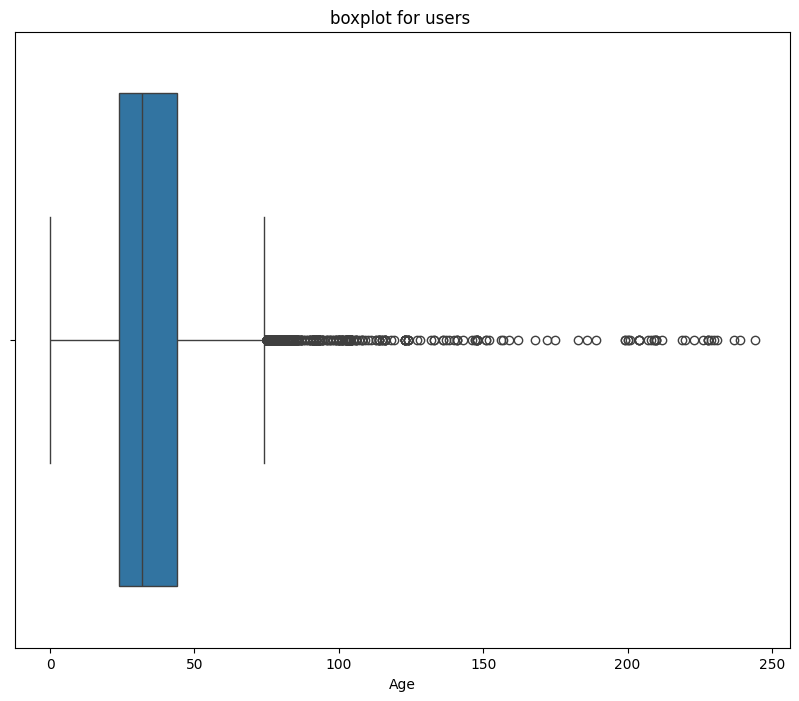

In [22]:
# df3
plt.figure(figsize=(10,8))
plt.title('boxplot for users ')
sns.boxplot(data=df3, x='Age')
plt.show()

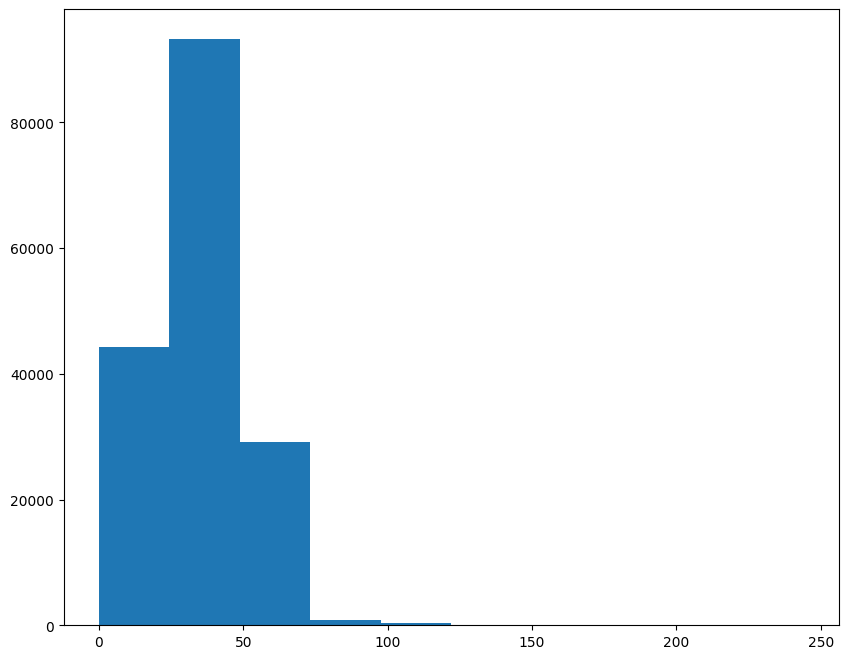

In [23]:
plt.figure(figsize=(10,8))
plt.hist(data=df3, x = 'Age')
plt.show()

In [24]:
def find_boundaries(data,variable):
    # Finding the IQR
    Q1 = data[variable].quantile(.25)
    Q3 = data[variable].quantile(.75)
    IQR = Q3 - Q1
    # Finding lower and upper bounadry
    l_boundary = Q1 - 1.5 * IQR
    u_boundary = Q3 + 1.5 * IQR
    return l_boundary, u_boundary

l_column , u_column = find_boundaries(df3, 'Age')
print("Lower boundary is: ", l_column)
print("Upper boundary is: ", u_column)


Lower boundary is:  -6.0
Upper boundary is:  74.0


In [25]:
remove = np.where(df3['Age'] > 74, True,
                  np.where(df3['Age'] < 10, True, False))

df3 = df3.loc[~(remove)]


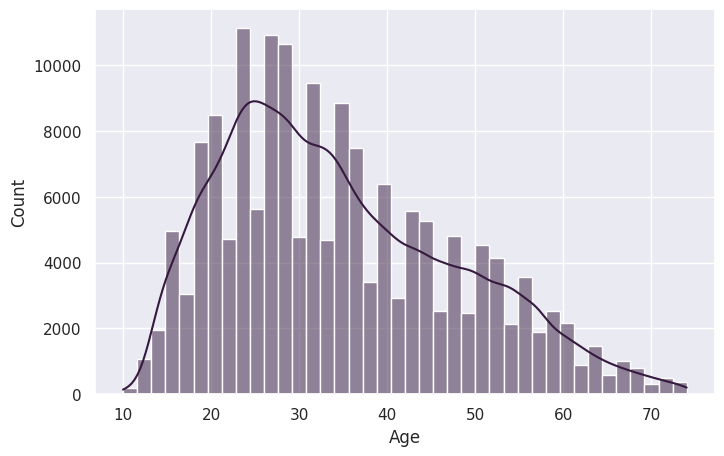

In [26]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data=df3, x= 'Age', kde=True, bins=40)

<Axes: ylabel='Age'>

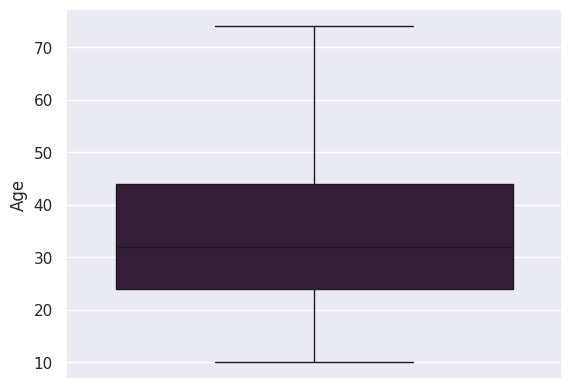

In [27]:
sns.boxplot(df3['Age'])

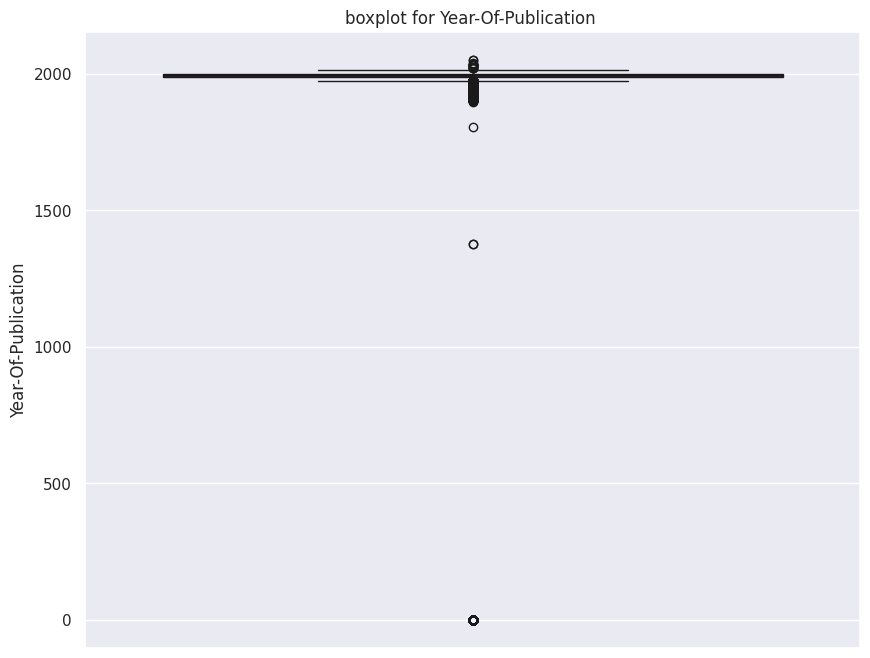

In [28]:
# df1
plt.figure(figsize=(10,8))
plt.title('boxplot for Year-Of-Publication ')
sns.boxplot(df1['Year-Of-Publication'])
plt.show()

<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

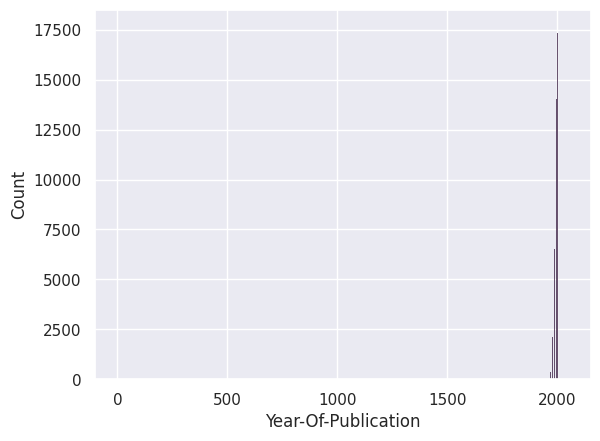

In [29]:
# df1['Year-Of-Publication'].plot(kind='hist')
sns.histplot(df1['Year-Of-Publication'])

In [30]:
lb_column,ub_column = find_boundaries(df1, 'Year-Of-Publication')
print("Lower boundary is: ", lb_column)
print("Upper boundary is: ", ub_column)

Lower boundary is:  1972.5
Upper boundary is:  2016.5


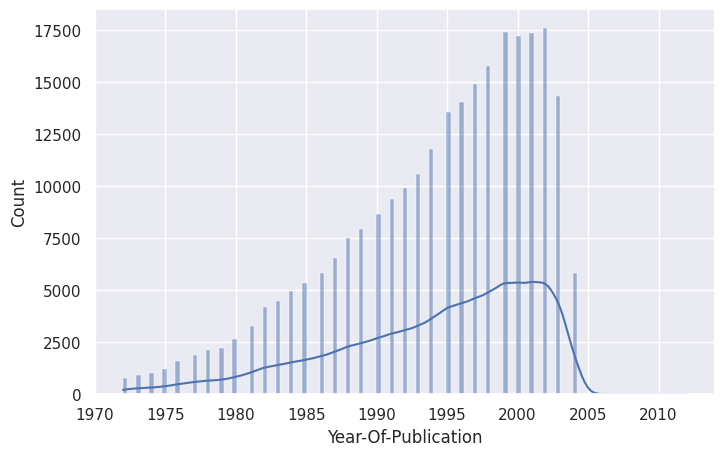

In [31]:
remove_year = np.where(df1['Year-Of-Publication'] < 1972, True,
                       np.where(df1['Year-Of-Publication'] > 2016, True, False))
df1 = df1.loc[~(remove_year)]

# Histogram for year of population
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
ax = sns.histplot(data=df1, x = 'Year-Of-Publication', kde=True)

Dealing with categorical data

In [32]:
# Construct new attribute
df3['Country'] = df3['Location'].str.extract(r',\s*([^,]+)$')

In [33]:
df3.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [34]:
df3.drop(columns=['Location'], inplace=True)

In [35]:
country_counts = df3['Country'].value_counts()
print(country_counts)

usa                138677
canada              21534
united kingdom      18388
germany             16922
spain               13050
                    ...  
myanmar                 1
carter                  1
usa & canada            1
p.r.china               1
united kingdom.         1
Name: Country, Length: 699, dtype: int64


([<matplotlib.patches.Wedge at 0x7d26717f0220>,
 [Text(-0.03297701222864079, 1.099505578278015, 'usa'),
  Text(-1.0480560696594037, -0.3340336432907368, 'canada'),
  Text(-0.790185819688052, -0.765249221080245, 'united kingdom'),
  Text(-0.4221083580231079, -1.0157876422200833, 'germany'),
  Text(-0.052630156942868433, -1.0987402179679095, 'spain'),
  Text(0.25842658490288245, -1.0692126543468485, 'australia'),
  Text(0.5282154355982186, -0.9648774293120264, 'italy'),
  Text(0.6829035003958567, -0.8623472671418901, 'france'),
  Text(0.74762900832514, -0.8068772310028136, 'portugal'),
  Text(0.8046948917797547, -0.7499774204224877, 'new zealand'),
  Text(0.8551624758049117, -0.6918794258938576, 'netherlands'),
  Text(0.8916456044549484, -0.6441801891211572, 'switzerland'),
  Text(0.9160659414641031, -0.6089525358264686, 'brazil'),
  Text(0.937458296970651, -0.5754754047228142, 'china'),
  Text(0.9560995648817218, -0.5439426642882341, 'sweden'),
  Text(0.9725023411242647, -0.514042018231

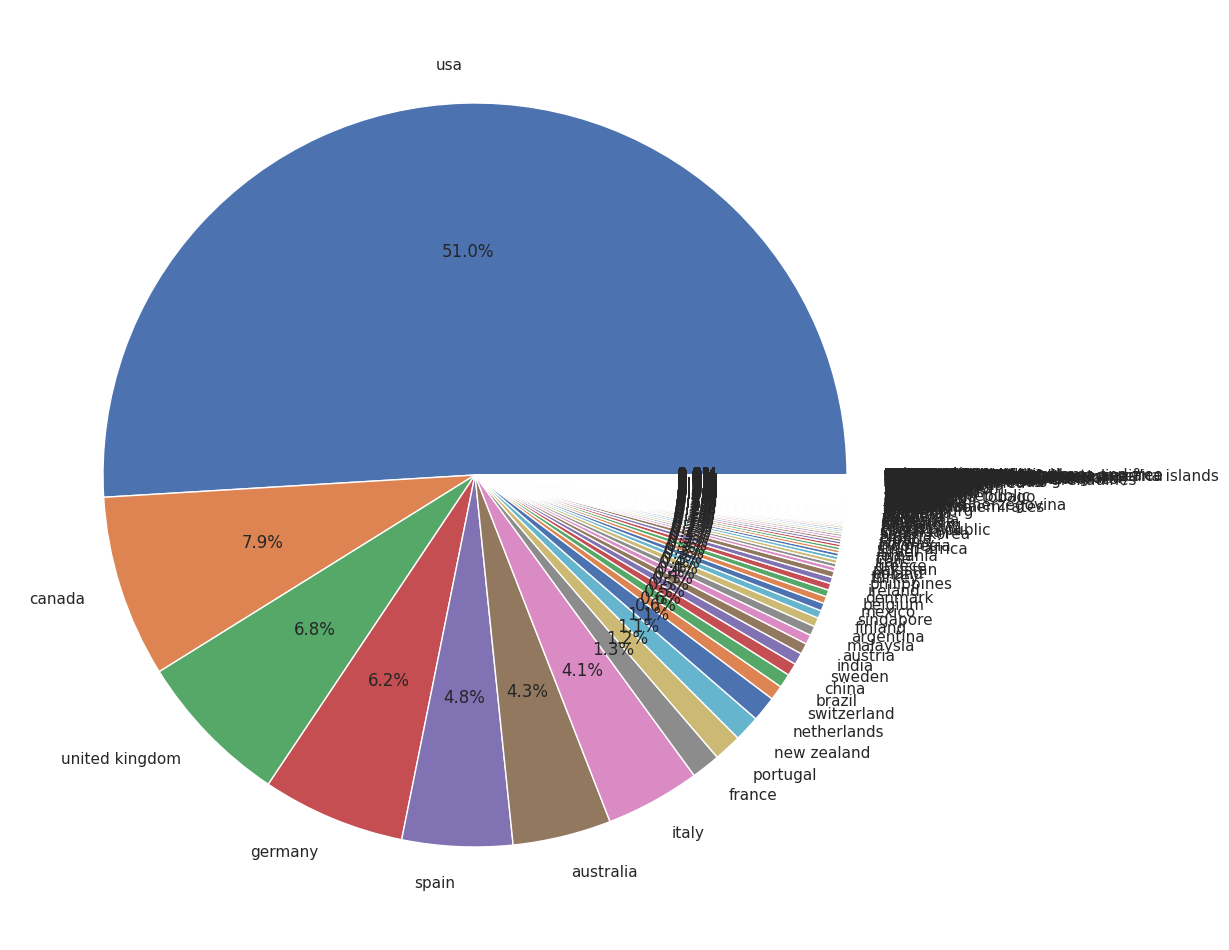

In [36]:
plt.figure(figsize=(12,16))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')

Merging the diferent dataframes

In [37]:
df_merge = pd.merge(df1,df2, on='ISBN', how='inner')

In [38]:
final_df = pd.merge(df_merge, df3, on='User-ID', how='inner')

In [39]:
print(final_df.shape)
final_df.head()

(997948, 9)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,NaN,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,NaN,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,NaN,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,NaN,canada


Saving data to a file.

In [40]:
# Identifing unique values
print("The total dataset has ", final_df.shape[0]," values.")
print("The dataset has ", final_df['ISBN'].nunique(), " books with unique values")
print("The dataset has ", final_df['User-ID'].nunique(), " users with unique values")
print("The dataset has ", sorted(final_df['Book-Rating'].unique()), " ratings.")



The total dataset has  997948  values.
The dataset has  260351  books with unique values
The dataset has  89539  users with unique values
The dataset has  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ratings.


<Axes: >

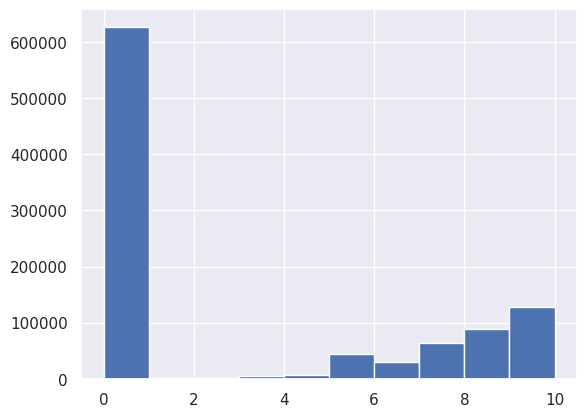

In [41]:
final_df['Book-Rating'].hist()

In [42]:
final_df.isnull().sum().sort_values(ascending=True)

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
User-ID                     0
Book-Rating                 0
Country                 23567
Age                    271701
dtype: int64

In [43]:
author_counts = final_df['Book-Author'].value_counts()
print(author_counts)

Stephen King               9905
Nora Roberts               8366
John Grisham               5907
James Patterson            5789
Mary Higgins Clark         4727
                           ... 
Charlotte Keppel              1
Charles Clerc                 1
For Truddi Chase Troops       1
Lewann Sotnak                 1
Dieter Birnbacher             1
Name: Book-Author, Length: 98499, dtype: int64


Transforming categorical data and splitting train and test data

In [44]:
# Divide data into training and vlidation subsets
# Data is split randomly
# x_train, x_test, y_train, y_test = train_test_split(final_df[['Book-Title','User-ID','Book-Author','Publisher','Year-Of-Publication','Book-Rating']]
#                                                     ,final_df['ISBN'], train_size=0.8, test_size=0.2, random_state=0)
# Divide data into training and vlidation subsets
train_df, test_df= train_test_split(final_df[['ISBN','Book-Title','User-ID','Book-Author','Publisher','Year-Of-Publication','Book-Rating','Country','Age']]
                                                    , train_size=0.8, test_size=0.2, random_state=0)
train_df.head()

,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Country,Age
676705,0590109715,"The Andalite Chronicles (Elfangor's Journey, A...",223530,Katherine Applegate,Apple,1997.0,0,usa,NaN
325862,1562056417,Deconstructing Web Graphics,209875,Lynda Weinman,Macmillan Computer Pub,1996.0,0,usa,43.0
809203,0684844729,STONES FROM THE RIVER,213504,Ursula Hegi,Simon &amp; Schuster,1997.0,0,usa,NaN
106915,0380777851,"My Teacher's a Bug (Spinetinglers, No 3)",198711,M. T. Coffin,Avon Books,1995.0,0,usa,62.0
759205,0308102282,Your Erroneous Zones,505,Wayne W. Dyer,Harpercollins,1976.0,0,usa,51.0


In [45]:
# cat_variable = ['Book-Author','Publisher']

In [46]:
# Frequency Encoding Technique
# encoder_dict = {}
# for var in cat_variable:
#     encoder_dict[var] = (train_df[var].value_counts()/len(train_df)).to_dict()


# encoder_dict

In [47]:
# Replace the categorical value with numeric value
# for var in cat_variable:
#     train_df[var] = train_df[var].map(encoder_dict[var])


In [48]:
print(train_df.shape)
train_df.head()

(798358, 9)


,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Country,Age
676705,0590109715,"The Andalite Chronicles (Elfangor's Journey, A...",223530,Katherine Applegate,Apple,1997.0,0,usa,NaN
325862,1562056417,Deconstructing Web Graphics,209875,Lynda Weinman,Macmillan Computer Pub,1996.0,0,usa,43.0
809203,0684844729,STONES FROM THE RIVER,213504,Ursula Hegi,Simon &amp; Schuster,1997.0,0,usa,NaN
106915,0380777851,"My Teacher's a Bug (Spinetinglers, No 3)",198711,M. T. Coffin,Avon Books,1995.0,0,usa,62.0
759205,0308102282,Your Erroneous Zones,505,Wayne W. Dyer,Harpercollins,1976.0,0,usa,51.0


In [49]:
train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/final.csv',index= False)

In [50]:
# Identifing unique values in the train df
print("The total dataset has ", train_df.shape[0]," values.")
print("The dataset has ", train_df['ISBN'].nunique(), " books with unique values")
print("The dataset has ", train_df['User-ID'].nunique(), " users with unique values")
print("The dataset has ", sorted(train_df['Book-Rating'].unique()), " ratings.")



The total dataset has  798358  values.
The dataset has  229965  books with unique values
The dataset has  79116  users with unique values
The dataset has  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ratings.


In [51]:
# Group movies by column showing number and mean of rating for each book
agg_rating = train_df.groupby('Book-Title').agg(rating_count = ('Book-Rating','count'),
                                          rating_mean = ('Book-Rating', 'mean')).reset_index()
print(agg_rating)
agg_rating.info()

                                               Book-Title  rating_count  \
0        A Light in the Storm: The Civil War Diary of ...             4   
1                                   Always Have Popsicles             1   
2                    Apple Magic (The Collector's series)             1   
3        Ask Lily (Young Women of Faith: Lily Series, ...             1   
4        Beyond IBM: Leadership Marketing and Finance ...             1   
...                                                   ...           ...   
206362                                      Ã?Â?lpiraten.             2   
206363                     Ã?Â?rger mit Produkt X. Roman.             3   
206364                                Ã?Â?sterlich leben.             1   
206365                              Ã?Â?stlich der Berge.             2   
206366                                  Ã?Â?thique en toc             1   

        rating_mean  
0              2.25  
1              0.00  
2              0.00  
3          

In [52]:
# Filter books with 50+ ratings only
popular_books = agg_rating[agg_rating['rating_count']>= 100]
print(len(popular_books))

638


In [53]:
popular_books.sort_values(by='rating_count', ascending=False).head()


,Book-Title,rating_count,rating_mean
201157,Wild Animus,2005,0.991521
167775,The Lovely Bones: A Novel,1039,4.435996
156613,The Da Vinci Code,704,4.603693
170314,The Nanny Diaries: A Novel,663,3.633484
4602,A Painted House,659,3.188164


In [54]:
popular_books.sort_values(by='rating_count', ascending=False).tail()

,Book-Title,rating_count,rating_mean
144281,Summer Pleasures,100,2.65
37198,Dances With Wolves,100,1.43
62111,Gap Creek: The Story Of A Marriage,100,3.39
36798,Daddy,100,1.68
53524,Executive Orders (Jack Ryan Novels),100,1.79


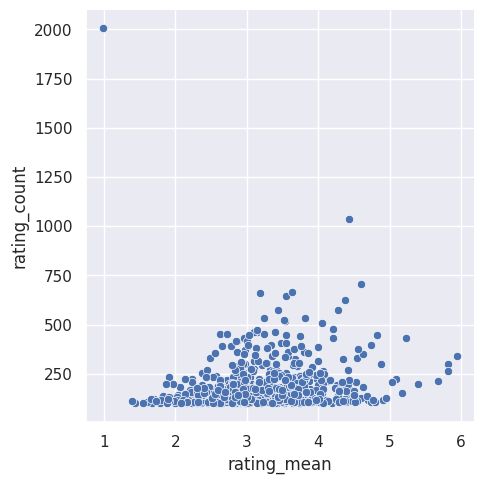

In [55]:
# Checking the relationship between rating count and mean.
sns.relplot(x='rating_mean', y='rating_count', data=popular_books)

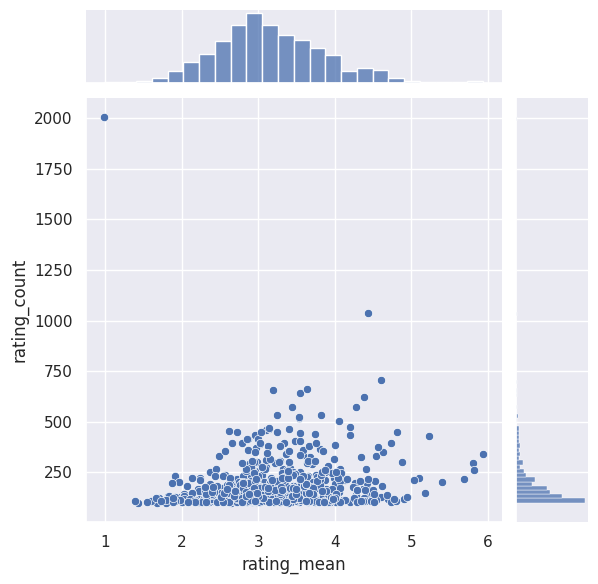

In [56]:
sns.jointplot(x='rating_mean', y='rating_count', data=popular_books) #Better approach

In [57]:
popular_books.to_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/popular100+_books.csv',index= False)

In [58]:
# mearge the popular books and train dataframe
final_train_df = pd.merge(train_df,popular_books, on='Book-Title', how='inner')
print(final_train_df.shape)
final_train_df.head()

(120947, 11)


,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Country,Age,rating_count,rating_mean
0,0684844729,STONES FROM THE RIVER,213504,Ursula Hegi,Simon &amp; Schuster,1997.0,0,usa,NaN,291,2.876289
1,068484477X,STONES FROM THE RIVER,21014,Ursula Hegi,Touchstone,1997.0,0,usa,NaN,291,2.876289
2,068484477X,STONES FROM THE RIVER,269719,Ursula Hegi,Touchstone,1997.0,0,usa,33.0,291,2.876289
3,068484477X,STONES FROM THE RIVER,275949,Ursula Hegi,Touchstone,1997.0,0,canada,50.0,291,2.876289
4,068484477X,STONES FROM THE RIVER,131594,Ursula Hegi,Touchstone,1997.0,0,usa,47.0,291,2.876289


In [59]:
final_train_df.tail()

,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Country,Age,rating_count,rating_mean
120942,0425109720,Patriot Games (Jack Ryan Novels),164728,Tom Clancy,Berkley Publishing Group,1992.0,8,usa,NaN,106,2.349057
120943,0425109720,Patriot Games (Jack Ryan Novels),227930,Tom Clancy,Berkley Publishing Group,1992.0,0,usa,NaN,106,2.349057
120944,0425109720,Patriot Games (Jack Ryan Novels),231265,Tom Clancy,Berkley Publishing Group,1992.0,0,tanzania,40.0,106,2.349057
120945,0425109720,Patriot Games (Jack Ryan Novels),63938,Tom Clancy,Berkley Publishing Group,1992.0,8,usa,NaN,106,2.349057
120946,0425109720,Patriot Games (Jack Ryan Novels),73741,Tom Clancy,Berkley Publishing Group,1992.0,0,usa,30.0,106,2.349057


In [60]:
print(final_train_df.shape)
print(final_train_df['User-ID'].nunique())

(120947, 11)
30134


User item Matrix

In [61]:
# User item matrix. Rows = users, column = book , value = rating
matrix = final_train_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
matrix.head(10)

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Confederacy of Dunces (Evergreen Book),...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis= 'rows')
print(matrix_norm.shape)
matrix_norm.head()

(30134, 638)


Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Confederacy of Dunces (Evergreen Book),...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
matrix_norm.tail()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Confederacy of Dunces (Evergreen Book),...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
278836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Pearson correlation similarity
user_similarity = matrix.T.corr()
user_similarity.head(10)

User-ID,9,14,16,17,26,32,39,42,44,51,...,278813,278819,278824,278828,278832,278836,278843,278844,278846,278854
User-ID,,,,,,,,,,,,,,,,,,,,,
9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cosine Similarities
c_user_similarity = cosine_similarity(matrix_norm.fillna(0))
c_user_similarity

In [ ]:
# Using User-ID 1 as an example to find similar users
pick_user = 638

# Remove him from the list
user_similarity.drop(index=pick_user, inplace=True)

# Take a look at the data
user_similarity.head()

Similarity matrix ranges from -1 to 1. with +ve values means same movie preference and -ve values means opposite movie preference
n = 10. picking out top 10 most similar users
since we are looking for similar interest we will set the threshold to a +ve value 0.3
sort the similarity from highest to lowest


In [ ]:
# Number of similar users
n = 20

# User similarity threashold
similarity_threashold = 0.3

# Get top 10 similar users
similar_user = user_similarity[user_similarity[pick_user]>similarity_threashold] [pick_user].sort_values(ascending=False)[:n]

print(f"Similar users for user id {pick_user} are ", similar_user)

Narrowing down the item pool

In [ ]:
# Books that picked user has read
pick_user_read = matrix_norm[matrix_norm.index == pick_user].dropna(axis=1, how='all')
pick_user_read

In [ ]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_book = matrix_norm[matrix_norm.index.isin(similar_user.index)].dropna(axis=1, how='all')
similar_user_book

In [ ]:
# Remove books watched by target user and keep books similar users read
for column in pick_user_read.columns:
    if column in similar_user_book.columns:
        similar_user_book[column].dropna(inplace=True)

similar_user_book

In [ ]:
# Dictionary to store item scores
item_scores = {}

# For loop to loop through columns/ books
for i in similar_user_book.columns:

    # Rating for book i
    book_rating = similar_user_book[i]

    # total score for book
    total = 0

    # Total number of scores
    count = 0

    # For loop for similar users through each book
    for u in similar_user.index:

        # Check for rating in each book by the user
        pd.isna(book_rating[u]) == False

        # If there is a rating, calculate score for the book
        score = similar_user[u] * book_rating[u]

        # Add score to the total score for that movie so far
        total += score

        # Add extra count for that score
        count += 1

    # Get the avg score for the movie
        item_scores[i] = total / count

# Convert dictionary to pandas df
item_scores = pd.DataFrame(item_scores.items(), columns=['Book','Book-Score'])

# Rank in decsending order
Ranked_scores = item_scores.sort_values(by='Book-Score', ascending=False)

# Select top ten rated books
m = 10
Ranked_scores.head(m)
